In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import astropy
import matplotlib.pyplot as plt
from scipy import spatial
import re

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

ng=pd.read_csv('NGC.csv', low_memory=False)
ms=pd.read_csv('messier_objects.csv', low_memory=False)
cb=pd.read_csv('constellation_borders.csv', low_memory=False)
ty=pd.read_csv('tycho-1.csv', low_memory=False)


## NGC

In [2]:
# print(ng.to_string())
display(ng)
print('empty mag:', ng['V'].isna().sum())
print('empty type:', ng['V'].isna().sum())
print('max mag:', ng['V'].max())
print('min mag:', ng['V'].min())
print('lowest declination:',ng['DEJ2000'].min())
print('highest declination:',ng['DEJ2000'].max())

,Unnamed: 0,Internal ID Number,Name,Common Name,Type,Constellation,V,RAJ2000,DEJ2000,Messier
0,0,Gal_And_IC 5370,IC 5370,-,Gal,Andromeda,15.0,0.0253,32.7500,0.0
1,1,notype_And_IC 5371,IC 5371,-,-,Andromeda,NaN,0.0503,32.8166,0.0
2,2,notype_Cas_NGC 7801,NGC 7801,-,-,Cassiopeia,NaN,0.1004,50.6999,0.0
3,3,Gal_And_IC 5372,IC 5372,-,Gal,Andromeda,15.0,0.1003,32.7833,0.0
4,4,Gal_And_IC 5373,IC 5373,-,Gal,Andromeda,15.0,0.1003,32.7833,0.0
...,...,...,...,...,...,...,...,...,...,...
13221,13221,Gal_And_IC 1525,IC 1525,-,Gal,Andromeda,NaN,359.8504,46.8999,0.0
13222,13222,Gal_Peg_NGC 7799,NGC 7799,-,Gal,Pegasus,NaN,359.8753,31.2833,0.0
13223,13223,Gal_Peg_NGC 7800,NGC 7800,-,Gal,Pegasus,13.0,359.9003,14.8167,0.0
13224,13224,Gal_Cet_NGC 7807,NGC 7807,-,Gal,Cetus,NaN,359.9003,-18.8500,0.0


empty mag: 5460
empty type: 5460
max mag: 18.0
min mag: 1.9
lowest declination: -89.3332
highest declination: 89.1168


In [3]:
ng[ng["Messier"]==1]

,Unnamed: 0,Internal ID Number,Name,Common Name,Type,Constellation,V,RAJ2000,DEJ2000,Messier
346,346,Gal_And_NGC 205,NGC 205,M 110,Gal,Andromeda,8.0,10.091894,41.685416,1.0
371,371,Gal_And_NGC 221,NGC 221,M 32,Gal,Andromeda,8.2,10.674271,40.865169,1.0
373,373,Gal_And_NGC 224,NGC 224,"Great Nebula in Andromeda, M 31",Gal,Andromeda,3.5,10.684708,41.268750,1.0
973,973,OpC_Cas_NGC 581,NGC 581,M 103,OpC,Cassiopeia,7.4,23.346000,60.650000,1.0
990,990,Gal_Tri_NGC 598,NGC 598,"M 33, Triangulum galaxy",Gal,Triangulum,5.7,23.462100,30.659942,1.0
...,...,...,...,...,...,...,...,...,...,...
12104,12104,GlC_Peg_NGC 7078,NGC 7078,M 15,GlC,Pegasus,6.4,322.493040,12.167000,1.0
12115,12115,OpC_Cyg_NGC 7092,NGC 7092,"M 39, M 40",OpC,Cygnus,4.6,322.950000,48.433000,1.0
12122,12122,GlC_Aqr_NGC 7089,NGC 7089,M 2,GlC,Aquarius,6.5,323.362580,-0.823250,1.0
12151,12151,GlC_Cap_NGC 7099,NGC 7099,M 30,GlC,Capricornus,7.5,325.092170,-23.179860,1.0


## Messiers

In [4]:
# print(ms.to_string())
display(ms)
print('empty mag:', ms['V (from SEDS)'].isna().sum())
print('empty type:', ms['Type'].isna().sum())
print('max mag:', ms['V (from SEDS)'].max())
print('min mag:', ms['V (from SEDS)'].min())
print('lowest declination:',ms['DEJ2000'].min())
print('highest declination:',ms['DEJ2000'].max())

,Internal ID Number,ID (for resolver),NGC,MAIN_ID,Common Name,Type,Constellation,RAJ2000,DEJ2000,V (from SEDS),V,B-V
0,SNR_Tau_M1,M 1,NGC 1952,M 1,Crab Nebula,SNR,Taurus,83.633080,22.014500,8.4,NaN,NaN
1,GlC_Aqr_M2,M 2,NGC 7089,M 2,-,GlC,Aquarius,323.362580,-0.823250,6.5,6.25,NaN
2,GlC_CVn_M3,M 3,NGC 5272,M 3,-,GlC,Canes Venatici,205.548420,28.377280,6.2,6.39,NaN
3,GlC_Sco_M4,M 4,NGC 6121,M 4,-,GlC,Scorpius,245.896750,-26.525750,5.6,NaN,NaN
4,GlC_Ser_M5,M 5,NGC 5904,M 5,-,GlC,Serpens,229.638420,2.081030,5.6,5.95,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Sy2_CVn_M106,M 106,NGC 4258,M 106,-,Sy2,Canes Venatici,184.740083,47.303719,8.4,8.41,0.73
106,GlC_Oph_M107,M 107,NGC 6171,M 107,-,GlC,Ophiucus,248.132750,-13.053780,7.9,8.85,1.11
107,SBG_UMa_M108,M 108,NGC 3556,M 108,-,SBG,Ursa Major,167.879029,55.674122,10.0,NaN,NaN
108,GiG_UMa_M109,M 109,NGC 3992,M 109,-,GiG,Ursa Major,179.399933,53.374519,9.8,NaN,NaN


empty mag: 0
empty type: 0
max mag: 10.2
min mag: 1.6
lowest declination: -34.793
highest declination: 69.679703


In [741]:
hmag = 20
mag = 5

mag_ng = ng[(ng["V"] <= hmag)]
mag_ms = ms[(ms['V (from SEDS)'] <= hmag)]
mag_ty = ty[(ty['V'] <= mag)]  # Tycho
dup_ng = mag_ng.copy(deep=True)  # NGC
dup_ms = mag_ms.copy(deep=True)  # Messier
dup_ty = mag_ty.copy(deep=True)  # Tycho
dup_cb = cb.copy(deep=True)  # Constellation borders
dup_ng['RAJ2000'] -= 360  # NGC transform
dup_ms['RAJ2000'] -= 360  # Messier transform
dup_ty['RAJ2000'] -= 360  # Tycho transfor9
dup_cb['RAJ2000'] -= 360  # Constellation borders transform

# sorting objects in messier_objects.csv and NGC.csv according to objects
# globular clusters
gc_ms = ms[(ms["Type"] == 'GlC')]
gc_ng = ng[(ng["Type"] == 'GlC')]
# open clusters
oc_ms = ms[(ms["Type"] == 'OpC') | (ms["Type"] == 'Cl*')]
oc_ng = ng[(ng["Type"] == 'OpC') | (ng["Type"] == 'C+N')]
# galaxies
ga_ms = ms[(ms["Type"] == 'G') | (ms["Type"] == 'Sy2') | (ms["Type"] == 'IG') | (ms["Type"] == 'GiG') | (
        ms["Type"] == 'GiP') | (ms["Type"] == 'SyG') | (ms["Type"] == 'SBG') | (ms["Type"] == 'BiC') | (
                   ms["Type"] == 'H2G')]
ga_ng = ng[(ng["Type"] == 'Gal')]
# nebula and supernova remnant
nb_ms = ms[(ms["Type"] == 'PN') | (ms["Type"] == 'RNe') | (ms["Type"] == 'HII') | (ms["Type"] == 'SNR')]
nb_ng = ng[(ng["Type"] == 'PN') | (ng["Type"] == 'Nb') | (ng["Type"] == 'Kt')]
# other messiers
ot_ms = ms[(ms["Type"] == 'As*') | (ms["Type"] == 'LIN') | (ms["Type"] == 'mul') | (
        ms["Type"] == 'AGN')]
# other ngc; stars
ot_ng = ng[(ng["Type"] == 'D+?') | (ng["Type"] == 'C+N') | (ng["Type"] == 'Kt') | (
        ng["Type"] == '*?') | (ng["Type"] == 'Ast') | (ng["Type"] == 'Str')]

# duplicated data sort by object type
# globular clusters
dup_gc_ms = dup_ms[(dup_ms["Type"] == 'GlC')]
dup_gc_ng = dup_ng[(dup_ng["Type"] == 'GlC')]
# open clusters
dup_oc_ms = dup_ms[(dup_ms["Type"] == 'OpC') | (dup_ms["Type"] == 'Cl*')]
dup_oc_ng = dup_ng[(dup_ng["Type"] == 'OpC') | (dup_ng["Type"] == 'C+N')]
# galaxies
dup_ga_ms = dup_ms[
    (dup_ms["Type"] == 'G') | (dup_ms["Type"] == 'Sy2') | (dup_ms["Type"] == 'IG') | (dup_ms["Type"] == 'GiG') | (
            dup_ms["Type"] == 'GiP') | (dup_ms["Type"] == 'SyG') | (dup_ms["Type"] == 'SBG') | (
            dup_ms["Type"] == 'BiC') | (
            dup_ms["Type"] == 'H2G')]
dup_ga_ng = dup_ng[(dup_ng["Type"] == 'Gal')]
# nebula and supernova remnant
dup_nb_ms = dup_ms[
    (dup_ms["Type"] == 'PN') | (dup_ms["Type"] == 'RNe') | (dup_ms["Type"] == 'HII') | (dup_ms["Type"] == 'SNR')]
dup_nb_ng = dup_ng[(dup_ng["Type"] == 'PN') | (dup_ng["Type"] == 'Nb') | (dup_ng["Type"] == 'Kt')]
# other messiers
dup_ot_ms = dup_ms[
    (dup_ms["Type"] == 'HII') | (dup_ms["Type"] == 'As*') | (dup_ms["Type"] == 'LIN') | (dup_ms["Type"] == 'mul') | (
            dup_ms["Type"] == 'AGN') | (dup_ms["Type"] == 'SNR')]
# other ngc; stars
dup_ot_ng = dup_ng[
    (dup_ng["Type"] == 'D+?') | (dup_ng["Type"] == 'C+N') | (dup_ng["Type"] == 'Kt') | (
            dup_ng["Type"] == '*?') | (dup_ng["Type"] == 'Ast') | (dup_ng["Type"] == 'Str')]

# dropping rows with missing mag values
gc_ms = gc_ms.dropna(subset=['V (from SEDS)'])
gc_ng = gc_ng.dropna(subset=['V'])
oc_ms = oc_ms.dropna(subset=['V (from SEDS)'])
oc_ng = oc_ng.dropna(subset=['V'])
ga_ms = ga_ms.dropna(subset=['V (from SEDS)'])
ga_ng = ga_ng.dropna(subset=['V'])
nb_ms = nb_ms.dropna(subset=['V (from SEDS)'])
nb_ng = nb_ng.dropna(subset=['V'])
ot_ms = ot_ms.dropna(subset=['V (from SEDS)'])
ot_ng = ot_ng.dropna(subset=['V'])

dup_gc_ms = dup_gc_ms.dropna(subset=['V (from SEDS)'])
dup_gc_ng = dup_gc_ng.dropna(subset=['V'])
dup_oc_ms = dup_oc_ms.dropna(subset=['V (from SEDS)'])
dup_oc_ng = dup_oc_ng.dropna(subset=['V'])
dup_ga_ms = dup_ga_ms.dropna(subset=['V (from SEDS)'])
dup_ga_ng = dup_ga_ng.dropna(subset=['V'])
dup_nb_ms = dup_nb_ms.dropna(subset=['V (from SEDS)'])
dup_nb_ng = dup_nb_ng.dropna(subset=['V'])
dup_ot_ms = dup_ot_ms.dropna(subset=['V (from SEDS)'])
dup_ot_ng = dup_ot_ng.dropna(subset=['V'])

mag_ty = mag_ty.dropna(subset=['V'])
dup_ty = dup_ty.dropna(subset=['V'])

# order by the mag value
gc_ms.sort_values(by=['V (from SEDS)'], inplace=True)
gc_ng.sort_values(by=['V'], inplace=True)
oc_ms.sort_values(by=['V (from SEDS)'], inplace=True)
oc_ng.sort_values(by=['V'], inplace=True)
ga_ms.sort_values(by=['V (from SEDS)'], inplace=True)
ga_ng.sort_values(by=['V'], inplace=True)
nb_ms.sort_values(by=['V (from SEDS)'], inplace=True)
nb_ng.sort_values(by=['V'], inplace=True)
ot_ms.sort_values(by=['V (from SEDS)'], inplace=True)
ot_ng.sort_values(by=['V'], inplace=True)

dup_gc_ms.sort_values(by=['V (from SEDS)'], inplace=True)
dup_gc_ng.sort_values(by=['V'], inplace=True)
dup_oc_ms.sort_values(by=['V (from SEDS)'], inplace=True)
dup_oc_ng.sort_values(by=['V'], inplace=True)
dup_ga_ms.sort_values(by=['V (from SEDS)'], inplace=True)
dup_ga_ng.sort_values(by=['V'], inplace=True)
dup_nb_ms.sort_values(by=['V (from SEDS)'], inplace=True)
dup_nb_ng.sort_values(by=['V'], inplace=True)
dup_ot_ms.sort_values(by=['V (from SEDS)'], inplace=True)
dup_ot_ng.sort_values(by=['V'], inplace=True)

mag_ty.sort_values(by=['V'], inplace=True)
dup_ty.sort_values(by=['V'], inplace=True)

## Unique object types in NGC and Messier Catalogue

In [16]:
print(ng['Type'].unique())
print(ms['Type'].unique())

['Gal' '-' 'Nb' 'Str' 'Ast' 'PN' 'GlC' 'OpC' 'D*?' 'C+N' 'Kt' 'PD' '*?']
['SNR' 'GlC' 'OpC' 'HII' 'As*' 'PN' 'G' 'IG' 'GiG' 'mul' 'Sy2' 'GiP' 'SyG'
 'LIN' 'Cl*' 'RNe' 'SBG' 'BiC' 'H2G' 'AGN']


## Grouping similar type objects; for plotting 

## Constellation borders

In [17]:
display(cb)

,RAJ2000,DEJ2000,Constellation
0,353.035698,35.189774,Andromeda
1,352.027387,35.188026,Andromeda
2,351.018963,35.186070,Andromeda
3,350.010539,35.183899,Andromeda
4,349.002342,35.181519,Andromeda
...,...,...,...
13034,291.873809,19.418251,Vulpecula
13035,290.872306,19.406878,Vulpecula
13036,290.121288,19.398298,Sagitta
13037,290.108328,20.398224,Sagitta


## Tycho-1 Catalogue

In [5]:
ty_names=ty[(ty['Name']!='-')]
ty_bayer=ty.dropna(subset=['Bayer'])
print('empty mag:', ty['V'].isna().sum())
print('with names:', len(ty_names))
print('with bayer:', len(ty_bayer))
print('max mag:', ty['V'].max())
print('min mag:', ty['V'].min())
display(ty)
dup_ty = ty.copy(deep=True)  # Tycho
dup_ty['RAJ2000'] -= 360  # Constellation borders transform
display(dup_ty)

empty mag: 0
with names: 340
with bayer: 3698
max mag: 10.5
min mag: -1.44


,Internal ID Number,Name,Constellation,Bayer,HIP,TYC,HD,RAJ2000,DEJ2000,V,B-V
0,Str_CMa_00000001,Sirius,Canis Major,alf CMa,32349.0,5949 2777 1,NaN,101.288541,-16.713143,-1.44,NaN
1,Str_Car_00000002,Canopus,Carina,alf Car,30438.0,8534 2277 1,45348.0,95.987951,-52.695650,-0.63,0.173
2,Str_Cen_00000003,Rigil Kentaurus,Centaurus,alf Cen,71683.0,9007 5849 1,NaN,219.920410,-60.835147,-0.01,NaN
3,Str_Lyr_00000004,Vega,Lyra,alf Lyr,91262.0,3105 2070 1,NaN,279.234108,38.782993,0.03,NaN
4,Str_Aur_00000005,Capella,Auriga,alf Aur,24608.0,3358 3141 1,NaN,79.172065,45.999029,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
592154,Str_Oct_00592155,-,Octans,NaN,NaN,9525 1122 1,NaN,347.101321,-83.261598,10.50,1.129
592155,Str_Oct_00592156,-,Octans,NaN,NaN,9526 1141 1,NaN,263.554830,-86.048977,10.50,0.446
592156,Str_Oct_00592157,-,Octans,NaN,NaN,9527 563 1,NaN,292.934492,-85.876995,10.50,0.846
592157,Str_Oct_00592158,-,Octans,NaN,NaN,9528 1932 1,NaN,313.888285,-84.824245,10.50,0.546


,Internal ID Number,Name,Constellation,Bayer,HIP,TYC,HD,RAJ2000,DEJ2000,V,B-V
0,Str_CMa_00000001,Sirius,Canis Major,alf CMa,32349.0,5949 2777 1,NaN,-258.711459,-16.713143,-1.44,NaN
1,Str_Car_00000002,Canopus,Carina,alf Car,30438.0,8534 2277 1,45348.0,-264.012049,-52.695650,-0.63,0.173
2,Str_Cen_00000003,Rigil Kentaurus,Centaurus,alf Cen,71683.0,9007 5849 1,NaN,-140.079590,-60.835147,-0.01,NaN
3,Str_Lyr_00000004,Vega,Lyra,alf Lyr,91262.0,3105 2070 1,NaN,-80.765892,38.782993,0.03,NaN
4,Str_Aur_00000005,Capella,Auriga,alf Aur,24608.0,3358 3141 1,NaN,-280.827935,45.999029,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
592154,Str_Oct_00592155,-,Octans,NaN,NaN,9525 1122 1,NaN,-12.898679,-83.261598,10.50,1.129
592155,Str_Oct_00592156,-,Octans,NaN,NaN,9526 1141 1,NaN,-96.445170,-86.048977,10.50,0.446
592156,Str_Oct_00592157,-,Octans,NaN,NaN,9527 563 1,NaN,-67.065508,-85.876995,10.50,0.846
592157,Str_Oct_00592158,-,Octans,NaN,NaN,9528 1932 1,NaN,-46.111715,-84.824245,10.50,0.546


In [723]:
full_ty = pd.concat([ty,dup_ty], axis=0)

In [725]:
full_ty.reset_index(drop=True)

,Internal ID Number,Name,Constellation,Bayer,HIP,TYC,HD,RAJ2000,DEJ2000,V,B-V
0,Str_CMa_00000001,Sirius,Canis Major,alf CMa,32349.0,5949 2777 1,NaN,101.288541,-16.713143,-1.44,NaN
1,Str_Car_00000002,Canopus,Carina,alf Car,30438.0,8534 2277 1,45348.0,95.987951,-52.695650,-0.63,0.173
2,Str_Cen_00000003,Rigil Kentaurus,Centaurus,alf Cen,71683.0,9007 5849 1,NaN,219.920410,-60.835147,-0.01,NaN
3,Str_Lyr_00000004,Vega,Lyra,alf Lyr,91262.0,3105 2070 1,NaN,279.234108,38.782993,0.03,NaN
4,Str_Aur_00000005,Capella,Auriga,alf Aur,24608.0,3358 3141 1,NaN,79.172065,45.999029,0.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1184313,Str_Oct_00592155,-,Octans,NaN,NaN,9525 1122 1,NaN,-12.898679,-83.261598,10.50,1.129
1184314,Str_Oct_00592156,-,Octans,NaN,NaN,9526 1141 1,NaN,-96.445170,-86.048977,10.50,0.446
1184315,Str_Oct_00592157,-,Octans,NaN,NaN,9527 563 1,NaN,-67.065508,-85.876995,10.50,0.846
1184316,Str_Oct_00592158,-,Octans,NaN,NaN,9528 1932 1,NaN,-46.111715,-84.824245,10.50,0.546


# Testing scipy.spatial algorithm

In [9]:
x=np.arange(0,20,1)
y=x**2
tree = spatial.KDTree(list(zip(x, y)))
print(tree.data)

m=np.random.uniform(size=20)
d = pd.DataFrame(zip(x,y,m), columns=['x', 'y', 'm'])


[[  0   0]
 [  1   1]
 [  2   4]
 [  3   9]
 [  4  16]
 [  5  25]
 [  6  36]
 [  7  49]
 [  8  64]
 [  9  81]
 [ 10 100]
 [ 11 121]
 [ 12 144]
 [ 13 169]
 [ 14 196]
 [ 15 225]
 [ 16 256]
 [ 17 289]
 [ 18 324]
 [ 19 361]]


In [614]:
d

,x,y,m
0,0,0,0.511780
1,1,1,0.229389
2,2,4,0.641211
3,3,9,0.046778
4,4,16,0.637552
5,5,25,0.231442
6,6,36,0.527678
7,7,49,0.699274
8,8,64,0.137243
9,9,81,0.538171


[ 2.          7.07106781 13.03840481 14.14213562 19.23538406] [5 4 6 3 2]


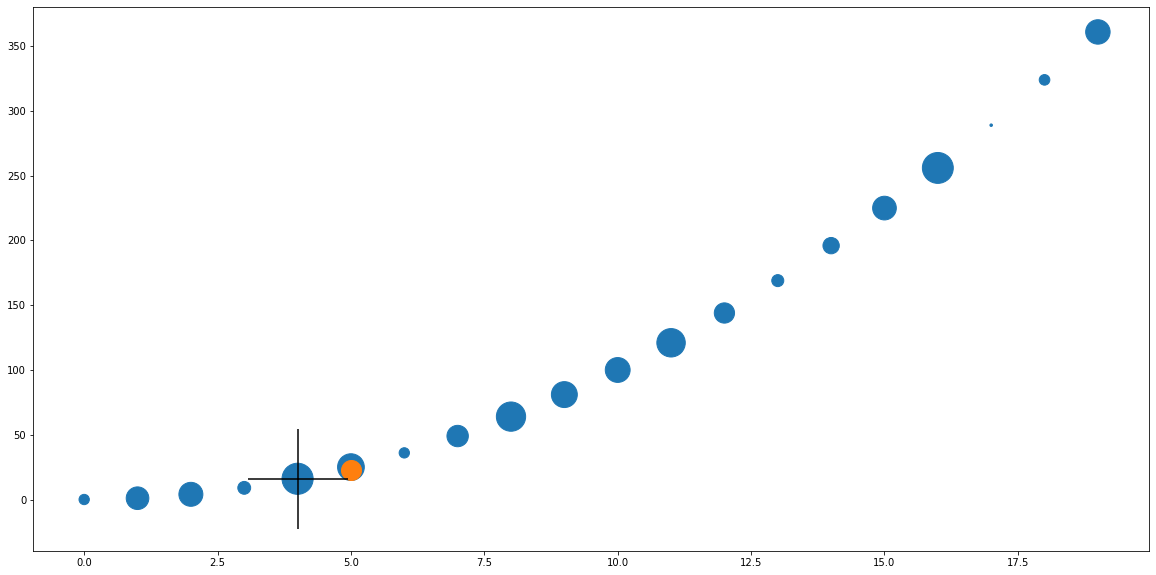

In [13]:
fig, ax=plt.subplots(1,1, figsize=(20,10))
ax.scatter(d['x'], d['y'], s=m*1000)
a=[5]
b=[22+1]
ax.scatter(a[0],b[0], s=400)

tree = spatial.KDTree(list(zip(x.ravel(), y.ravel())))
points=np.array([a[0],b[0]])
# dist,ind = tree.query(points, 100)
dist,ind = tree.query(points, k=5)

print(dist, ind)
ax.scatter(d['x'][d['m'][ind].idxmax()],  d['y'][d['m'][ind].idxmax()], c='black', s=10000, marker='+')
plt.show()


# dictionary to csv

In [622]:
d = {key:value for key,value in d.items() if value != []}

In [623]:
for key, value in d.items():
    print(key, value)

M 1 [[264.3013508181, 23.4247603711], '']
M 12 [[202.4837294786, 34.5242720338], [180.6105310132, -11.934205699200001], [92.90244891799999, 48.710984377799996], 'asdf']
M 44 [[159.39973505540001, -0.5981222514], [215.1784837112, 57.1811962786], None]


In [597]:
column_names =  list(range(1,11,1))
column_names.append('Instruction')   
column_names.insert(0,"Messier")
print(column_names)

['Messier', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Instruction']


In [598]:
df = pd.DataFrame(columns = column_names)
messier = list(d.keys())
df['Messier']=messier
print(df)

  Messier    1    2    3    4    5    6    7    8    9   10 Instruction
0  M 1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       
1  M 12    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       
2  M 44    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       


In [600]:
for i in range(len(messier)):
    for j in range(len(d[messier[i]])-1):
        df[j+1][df.index[df['Messier'] == messier[i]]] = ','.join(str(v) for v in d[messier[i]][j])
        df[j+1][df.index[df['Messier'] == messier[i]]] = df[j+1][df.index[df['Messier'] == messier[i]]].astype(str)+','+(ty['Name'][ty.index[ty["RAJ2000"]==d[messier[i]][j][0]]].values)
    messier_coord=[float(ms['RAJ2000'][ms.index[ms['ID (for resolver)']==messier[i]]]), float(ms['DEJ2000'][ms.index[ms['ID (for resolver)']==messier[i]]])]
    df[len(d[messier[i]])][df.index[df['Messier'] == messier[i]]] = ','.join(str(v) for v in messier_coord)
    if d[messier[i]][-1] == None or d[messier[i]][-1] =='':
        df['Instruction'][df.index[df['Messier'] == messier[i]]] = '-'
    else:
        df['Instruction'][df.index[df['Messier'] == messier[i]]] = d[messier[i]][-1]
#         print(d[messier[i]][-1])

print(df)

  Messier                                   1  \
0  M 1     264.3013508181,23.4247603711,-       
1  M 12    202.4837294786,34.5242720338,-       
2  M 44    159.39973505540001,-0.5981222514,-   

                                      2  \
0  83.63308,22.0145                       
1  180.6105310132,-11.934205699200001,-   
2  215.1784837112,57.1811962786,-         

                                        3                   4    5    6    7  \
0  NaN                                     NaN                 NaN  NaN  NaN   
1  92.90244891799999,48.710984377799996,-  251.80908,-1.94853  NaN  NaN  NaN   
2  130.1,19.667                            NaN                 NaN  NaN  NaN   

     8    9   10 Instruction  
0  NaN  NaN  NaN  -           
1  NaN  NaN  NaN  asdf        
2  NaN  NaN  NaN  -           


# Markers for legend

In [ ]:
from numpy.random import randn
m=np.random.uniform(size=10)
x=np.arange(0,10,1)
y=x**2

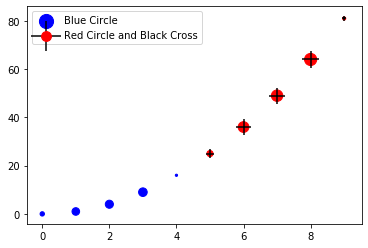

In [718]:
fig, ax = plt.subplots(1,1)

blue_dot = ax.scatter(x[:5],y[:5], s=m*100, color='b')
# # Put a white cross over some of the data.
red_dot = ax.scatter(x[5:],y[5:], s=200*m, color='r')
black_cross = ax.scatter(x[5:],y[5:], s=400*m, marker='+', color='k')

lgnd = ax.legend([blue_dot, (black_cross,red_dot)], ["Blue Circle", "Red Circle and Black Cross"])
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [900]


# Marker sizes comparison

In [30]:
a=np.arange(0,44,5)
b=5*np.ones(9)
b1=4.5*np.ones(9)
c=np.arange(1,10,1)

In [31]:
a

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40])

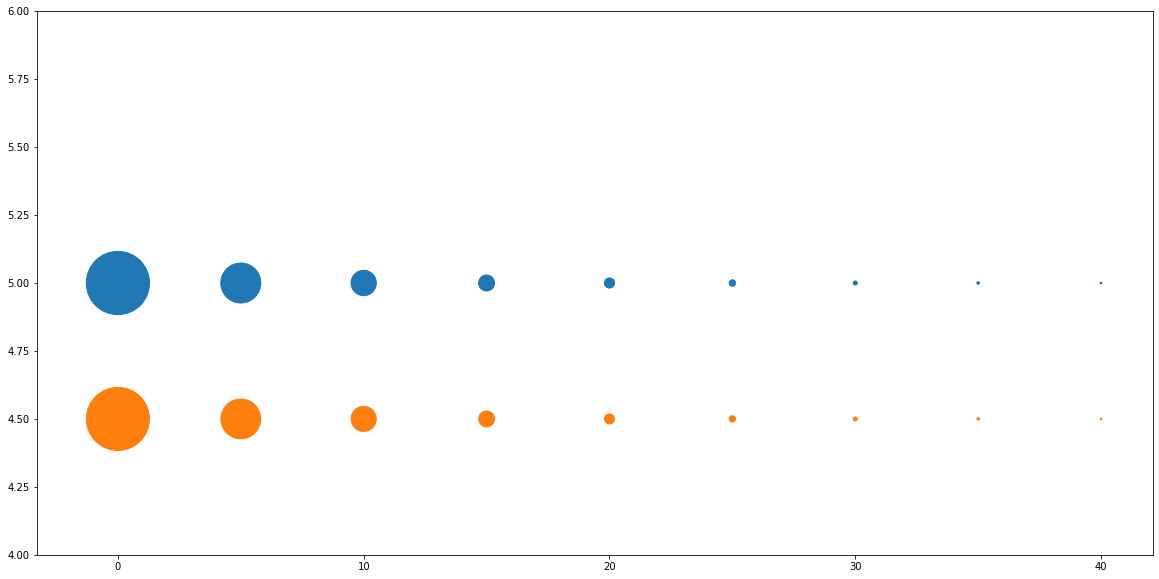

In [38]:
fig, ax=plt.subplots(1,1, figsize=(20,10))
ax.scatter(a,b, s=10000/2.5**c)
ax.scatter(a,b1, s=10000*10**(-c/2.5))
ax.set_ylim([4,6])
plt.show()
